In [1]:
library(rethinking)

Loading required package: rstan
Warning message:
"package 'rstan' was built under R version 3.3.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.2"Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.3.2"rstan (Version 2.13.2, packaged: 2016-12-18 07:04:42 UTC, GitRev: 5fa1e80eb817)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.59)


In [2]:
data(foxes)

In [3]:
Fx <- foxes

In [4]:
summary(foxes$area)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.090   2.590   3.130   3.169   3.772   5.070 

In [5]:
#(1) 
area.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*area ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

area.seq<-seq(from=1,to=5,by=.5)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu <- link( area.Model , data=data.frame(area=area.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight <- sim( area.Model , data=data.frame(area=area.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [6]:
HPDI(samples = sim.weight, prob = c(.5, .89, .97))
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
1.832756 2.559945 3.614672 3.649990 2.538729 1.862049

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [7]:
mean(Fx$weight)
mean(sim.weight)

[1] 4.529655

[1] 4.52998

In [8]:
area.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b 
4.45094203 1.17868348 0.02483738 

Log-likelihood: -183.67 

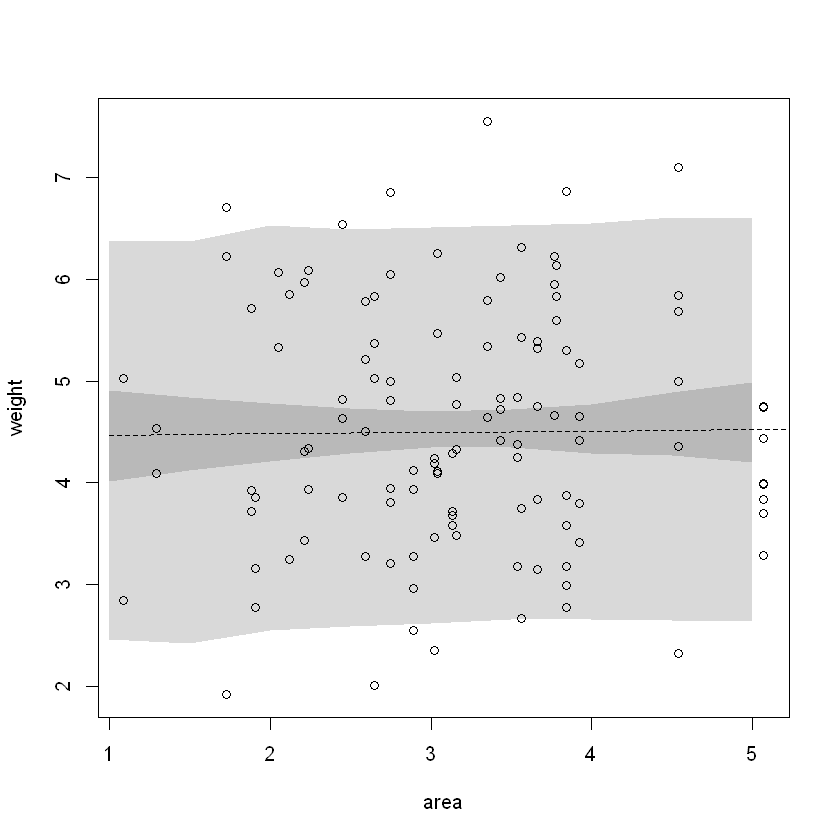

In [9]:
plot(weight~area, Fx)
lines(apply( mu , 2 , mean ), lty=2)
shade(apply( sim.weight , 2 , HPDI, prob = 0.9 ),area.seq)
shade(apply( mu , 2 , HPDI, prob = 0.9 ),area.seq)

In [44]:
#(2) 
groupsize.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*groupsize ,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) ,       
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ) )

size.seq<-seq(from=2,to=8,by=.5)

#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu1 <- link( groupsize.Model , data=data.frame(groupsize=size.seq) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight1 <- sim( groupsize.Model , data=data.frame(groupsize=size.seq),   n=1e4  ) 

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [45]:
HPDI(samples = sim.weight1, prob = c(.5, .89, .97))
HPDI(samples = Fx$weight,prob = c(.5, .89, .97) )

|0.97    |0.89     |0.5     0.5|    0.89|    0.97| 
2.247574 2.966849 3.923918 3.982637 2.822486 2.287607

|0.97 |0.89  |0.5  0.5| 0.89| 0.97| 
 1.92  2.78  3.25  4.84  6.31  6.86

In [46]:
mean(Fx$weight)
mean(sim.weight1)

[1] 4.529655

[1] 4.456623

In [47]:
groupsize.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * groupsize
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b 
 5.0679376  1.1635300 -0.1238907 

Log-likelihood: -182.17 

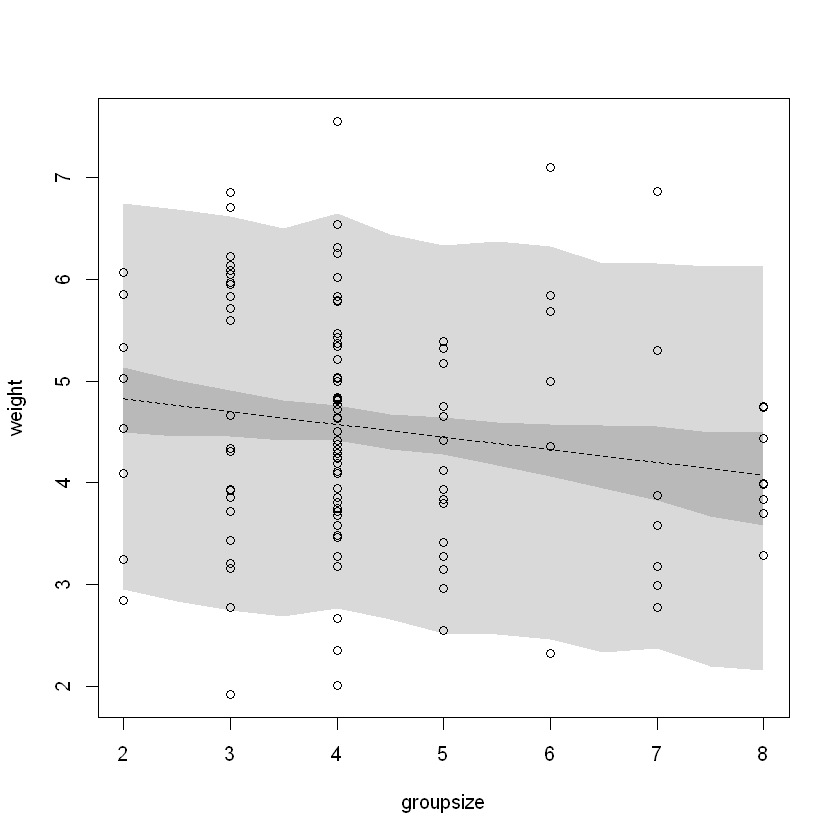

In [48]:
plot(weight~groupsize, Fx)
lines(size.seq,apply( mu1 , 2 , mean ), lty=2)
#lines(apply( sim.weight1 , 2 , mean ))
shade(apply( sim.weight1 , 2 , HPDI, prob = 0.9 ),size.seq)
shade(apply( mu1 , 2 , HPDI, prob = 0.9 ),size.seq)

In [49]:
#(1) 
Multi.Model <- map( 
    alist( 
        weight ~ dnorm( mu , sigma ),
        mu <- a + b*area +b1*groupsize,
        a ~ dnorm( 4 , 100 ) ,
        b ~ dnorm( 0 , 10 ) , 
        b1 ~ dnorm( 0 , 10 ) , 
        sigma ~ dunif( 0 , 50 ) ) ,
    data=Fx , start=list( a=mean(Fx$weight) , sigma=sd(Fx$weight) , b=0 ,b1=0) )

[ 1000 / 1000 ]
[ 10000 / 10000 ]


In [53]:
Multi.Model


Maximum a posteriori (MAP) model fit

Formula:
weight ~ dnorm(mu, sigma)
mu <- a + b * area + b1 * groupsize
a ~ dnorm(4, 100)
b ~ dnorm(0, 10)
b1 ~ dnorm(0, 10)
sigma ~ dunif(0, 50)

MAP values:
         a      sigma          b         b1 
 4.4504217  1.1184517  0.6178220 -0.4324061 

Log-likelihood: -177.58 

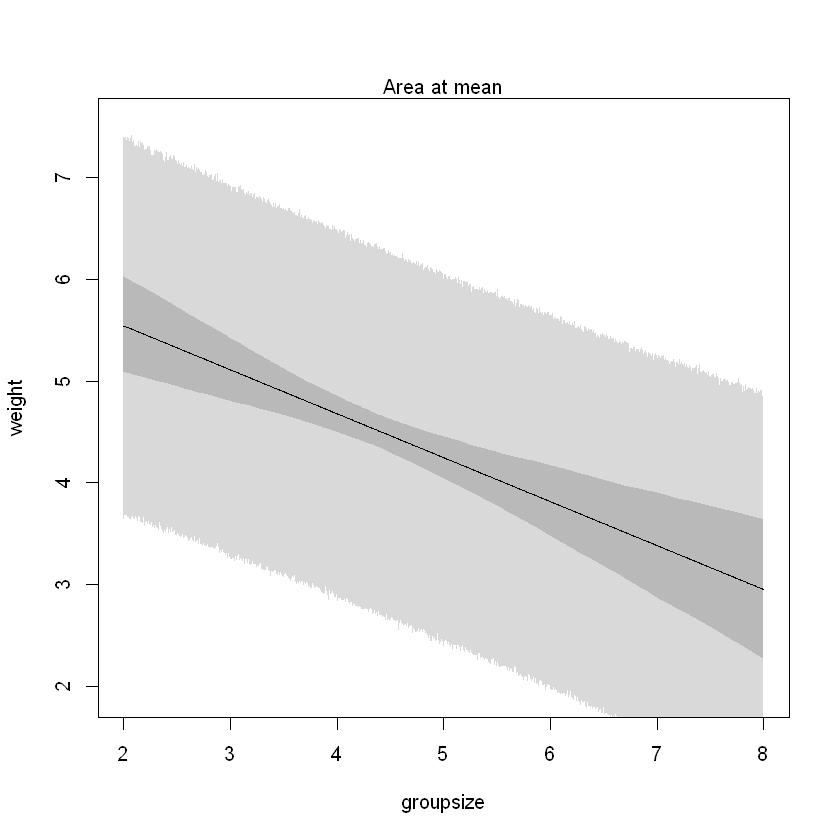

In [52]:
size.seq<-seq(from=2,to=8, length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi <- link( Multi.Model , data=data.frame(groupsize=size.seq,area=mean(Fx$area) ) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi <- sim( Multi.Model , data=data.frame(groupsize=size.seq, area=mean(Fx$area) ),   n=1e4  ) 
#display
plot(weight~groupsize, Fx , type="n")
mtext("Area at mean")
lines(size.seq , apply(mu.multi, 2, mean))
shade(apply( mu.multi , 2, PI) , size.seq  )
shade(apply( sim.weight.Multi , 2, PI) , size.seq  )

[ 1000 / 1000 ]
[ 10000 / 10000 ]


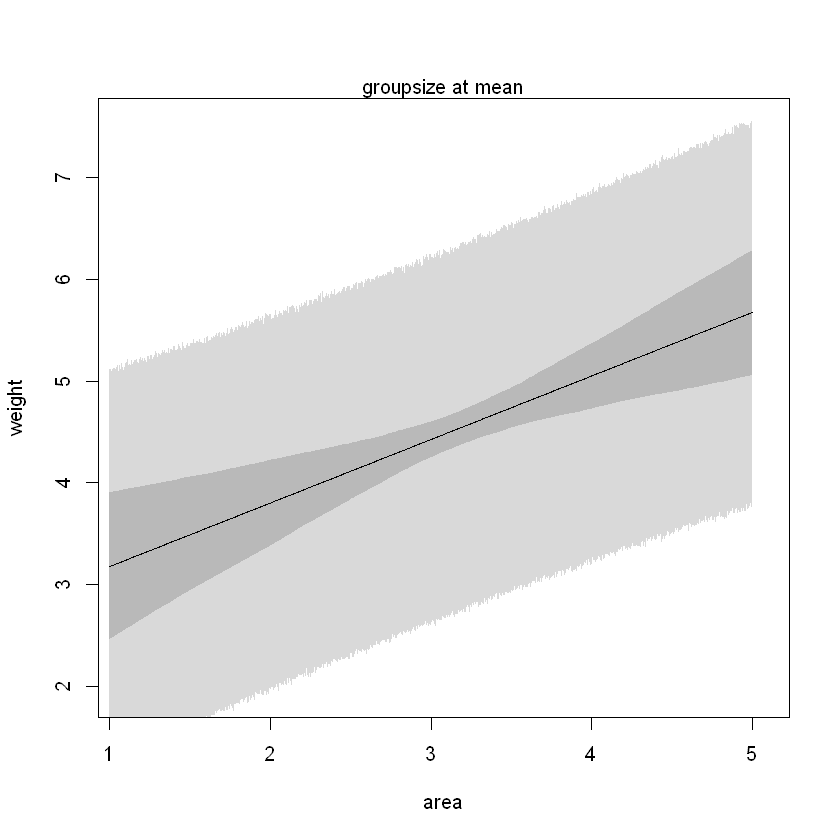

In [54]:
area.seq<-seq(from=1,to=5, length.out=1e3)
#Draw parameter samples from posterior. There's variance/uncertainty in mu.
mu.multi2 <- link( Multi.Model , data=data.frame(groupsize=mean(Fx$groupsize),area=area.seq ) )
#Draw Prediction Simulations from psterior. There's variance/uncertainty in prediction/outcome.
sim.weight.Multi2 <- sim( Multi.Model , data=data.frame(groupsize=mean(Fx$groupsize), area=area.seq ),   n=1e4  ) 


Multi2.pi <- apply(sim.weight.Multi2 , 2 , PI)
#display
plot(weight~area, Fx , type="n")
mtext("groupsize at mean")
lines(area.seq , apply(mu.multi2, 2, mean))
shade(apply( mu.multi2 , 2, PI) , area.seq  )
shade(apply( sim.weight.Multi2 , 2, PI) , area.seq  )